In [78]:
import pandas as pd
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

#### Чтение данных из файла

In [79]:
# Чтение данных из файла
data = pd.read_csv('data.csv', sep=" ")
y = data['Y'] 
X = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X6']] 

data

,X1,X2,X3,X4,X5,X6,Y
0,0.98,514.5,294.0,110.25,7,2,15.55
1,0.98,514.5,294.0,110.25,7,3,15.55
2,0.98,514.5,294.0,110.25,7,4,15.55
3,0.98,514.5,294.0,110.25,7,5,15.55
4,0.90,563.5,318.5,122.50,8,2,20.84


### Обучение модели

In [80]:
model = OLS(y, X).fit()


In [86]:

significant_factors = []
print(model.pvalues)
for i in range(len(X.columns)):
   if abs(model.pvalues[i]) < 0.05: # 0.05 - это уровень значимости
       significant_factors.append(X.columns[i])

None

X1    3.157873e-27
X2    2.704816e-27
X3    3.272561e-27
X4    3.089702e-27
X5    3.128727e-27
X6    9.733137e-01
dtype: float64


C:\Users\hepret\AppData\Local\Temp\ipykernel_20900\1071730160.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(model.pvalues[i]) < 0.05: # 0.05 - это уровень значимости


### Матрица корреляций

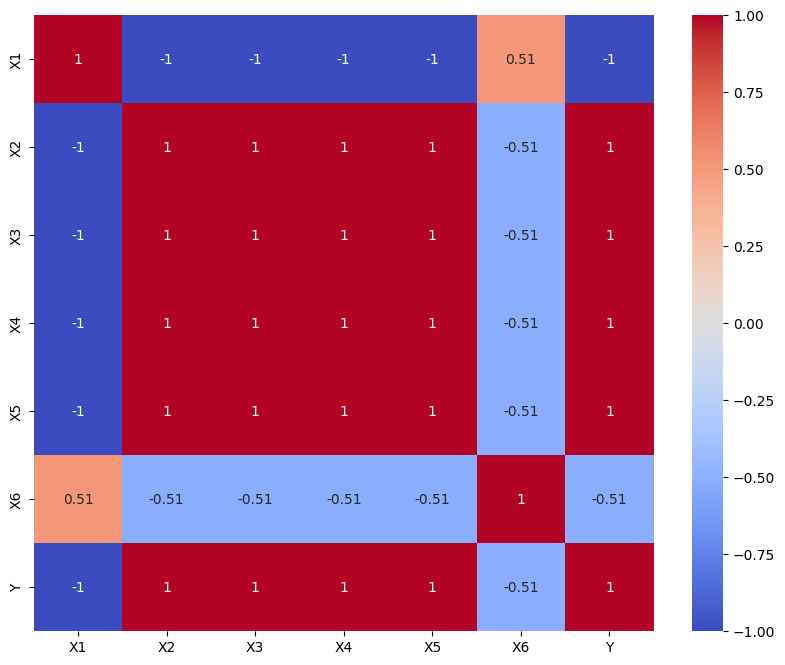

In [82]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Оценка адекватности модели


In [83]:
f_stat = model.fvalue
print('F-статистика:', f_stat)

mse = mean_squared_error(y, model.predict())
rmse = np.sqrt(mse)
print('Среднеквадратичная ошибка (RMSE):', rmse)

mae = mean_absolute_error(y, model.predict())
print('Средняя абсолютная ошибка (MAE):', mae)

F-статистика: 4.7216905579457977e+26
Среднеквадратичная ошибка (RMSE): 9.737935699870244e-14
Средняя абсолютная ошибка (MAE): 9.734435479913372e-14


### Чтения данных для получения значений

In [84]:
input_data = pd.read_csv('input.csv', sep=" ")
input_data

,X1,X2,X3,X4,X5,X6
0,0.98,514.5,294.0,110.25,7,2
1,0.98,514.5,297.0,110.25,8,3


### Предсказание 

In [85]:
model.predict(input_data)

0    15.550000
1    13.280498
dtype: float64